In [18]:
using DifferentialEquations
using Plots
include("JuSim.jl")

@System (macro with 1 method)

In [39]:
s = @System begin
    gainblk = GainBlock(:A)
    gainblk1 = GainBlock(:B)
    addblk = AddBlock([:+, :-])
    intblk = IntegratorBlock()
    addblk.outport => intblk.inport, :x_dot
    intblk.outport => gainblk.inport, :x
    gainblk.outport => addblk.inports[1]
    intblk.outport => gainblk1.inport, :x
    gainblk1.outport => addblk.inports[2]
end
;

In [40]:
(s.params, s.vars)

(Set(Symbol[:A, :B]), Set(Symbol[:aotsrozfyl, :zisdzmtaie, :x_dot, :x]))

In [41]:
f = model(s)

#13 (generic function with 1 method)

In [42]:
u0 = [0.5, 0]
tspan = (0.0,1.0)
p=[4.0, 5.0]
prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [0.5, 0.0]

In [43]:
solver = RK4()
#solver = Euler()
# ソルバーの選択 Euler(), RK4()
@time sol=solve(prob, solver)

  2.295334 seconds (3.81 M allocations: 188.291 MiB, 5.80% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 12-element Array{Float64,1}:
 0.0                  
 0.0019960040079481356
 0.015641420547394418 
 0.04709085863348049  
 0.09533293906278167  
 0.16295335774802377  
 0.2538840516280726   
 0.3702889571578369   
 0.5141896825159133   
 0.6860246844832969   
 0.8852707544060119   
 1.0                  
u: 12-element Array{Array{Float64,1},1}:
 [0.5, 0.0]              
 [0.499003, -0.000997007]
 [0.49224, -0.00775986]  
 [0.477, -0.0229996]     
 [0.454535, -0.0454649]  
 [0.424815, -0.0751846]  
 [0.387891, -0.112109]   
 [0.345267, -0.154733]   
 [0.298993, -0.201007]   
 [0.251788, -0.248212]   
 [0.206302, -0.293698]   
 [0.183941, -0.316059]   

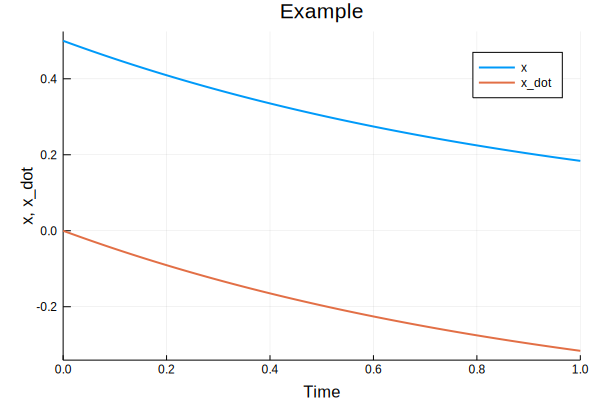

In [44]:
plot(sol, linewidth=2, title="Example", xaxis="Time", yaxis="x, x_dot",label=["x", "x_dot"])